In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [89]:
data=pd.read_excel("dataset.xlsx")

In [130]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ind_5,5126.0,-1.251853,23.546553,-131.000000,-14.000000,0.000000,13.000000,69.000000
ind_6,5126.0,-1.240148,23.550694,-131.000000,-14.000000,0.000000,13.000000,69.000000
ind_8,5126.0,49.016220,36.340676,0.000000,14.285714,50.000000,85.714286,100.000000
ind_9,5126.0,48.042194,36.619184,0.000000,14.285714,42.857143,85.714286,100.000000
ind_10,5126.0,0.974026,60.375932,-100.000000,-50.000000,7.142857,57.142857,100.000000
...,...,...,...,...,...,...,...,...
ind_426,5126.0,0.496659,0.231322,0.000000,0.316777,0.494094,0.677657,1.000000
ind_428,5126.0,0.487013,0.151328,0.083530,0.373447,0.490489,0.600395,0.868534
20_target,5126.0,-0.022710,14.775880,-15.780588,-15.229653,0.000000,15.389812,15.768767
50_target,5126.0,-3.528451,34.294926,-37.142889,-36.096054,-34.282556,35.374015,37.038694


In [101]:
data=data.replace('?',np.nan)

In [116]:
data=data.dropna(axis=0,how="any")

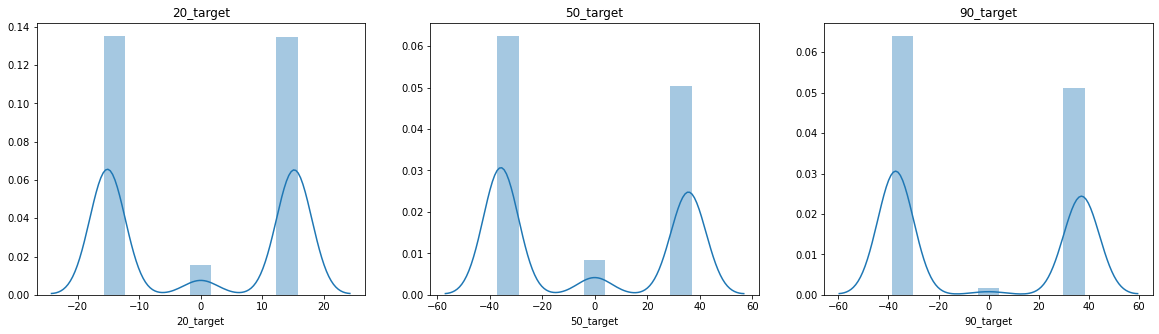

In [124]:
fig, ax = plt.subplots(1,3, figsize = (20, 5))
sns.distplot(data["20_target"], ax = ax[0])
ax[0].set_title("20_target")
sns.distplot(data["50_target"], ax = ax[1])
ax[1].set_title("50_target")
sns.distplot(data["90_target"], ax = ax[2])
ax[2].set_title("90_target")
plt.show()

In [125]:
ab=((data.corr()["90_target"]))
abc=pd.DataFrame(ab)

In [143]:
abc.sort_values(by=['90_target']).tail(10)

,90_target
ind_36,0.091511
ind_332,0.104910
ind_77,0.107244
ind_16,0.112978
ind_17,0.131409
ind_412,0.134286
ind_18,0.142171
20_target,0.344982
50_target,0.935970
90_target,1.000000


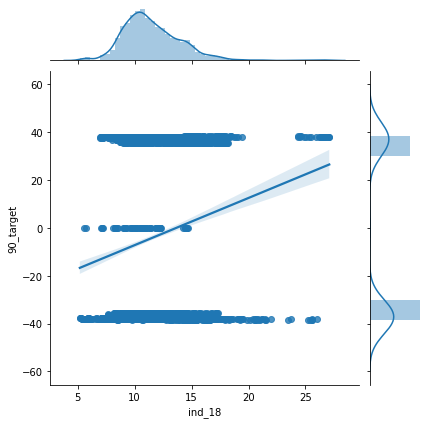

In [127]:
sns.jointplot(x="ind_18",y="90_target",data=data, kind="reg");

In [104]:
import statsmodels.api as sm 

In [105]:
x=data[["ind_18"]]
x[0:5]
x=sm.add_constant(x) # B1 ekleniyor.
x[0:5]
y=data[["90_target"]]
x[0:5]

,const,ind_18
0,1.0,9.1100
1,1.0,9.2225
2,1.0,9.3125
3,1.0,9.4150
4,1.0,9.8925


In [128]:
lm=sm.OLS(y,x)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              90_target   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     124.8
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           1.04e-28
Time:                        17:20:46   Log-Likelihood:                -30930.
No. Observations:                6167   AIC:                         6.186e+04
Df Residuals:                    6165   BIC:                         6.188e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.8498      2.070    -12.489      0.000     -29.907     -21.792
ind_18         1.9169      0.172     11.173      0.000       1.581       2.253
==============================================================================
Omnibus:                    23170.861   Durbin-Watson:                   0.299
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              931.107
Skew:                           0.170   Prob(JB):                    6.50e-203
Kurtosis:                       1.127   Cond. No.                         54.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
model.f_pvalue

1.044878814169088e-28

In [132]:
model.fittedvalues[0:5]

0   -8.387276
1   -8.171630
2   -7.999113
3   -7.802635
4   -6.887336
dtype: float64

In [133]:
y[0:5]

,90_target
0,36.997753
1,37.016198
2,-37.024805
3,-37.040483
4,-37.103503


In [138]:
from sklearn.metrics import mean_squared_error,r2_score

In [139]:
mse=mean_squared_error(y,model.fittedvalues)

In [140]:
mse

1330.146123108287

In [141]:
import numpy as np
rmse=np.sqrt(mse)
rmse

36.47116838145286

In [142]:
from sklearn.model_selection import train_test_split , cross_val_score, cross_val_predict

In [152]:
data2=pd.read_excel("dataset.xlsx",usecols=["ind_36","ind_332","ind_77","ind_16","ind_17","ind_412","ind_18","90_target"])

In [157]:
data2=data2.replace('?',np.nan)
data2=data2.dropna(axis=0,how="any")


In [158]:
data2.corr()

,ind_16,ind_17,ind_18,ind_36,ind_77,ind_332,ind_412,90_target
ind_16,1.000000,0.921295,0.429029,-0.018995,0.042064,0.039247,-0.025170,0.108077
ind_17,0.921295,1.000000,0.545873,-0.017085,0.045916,0.064045,-0.036754,0.129277
ind_18,0.429029,0.545873,1.000000,0.088234,0.134456,0.160939,-0.018460,0.140877
ind_36,-0.018995,-0.017085,0.088234,1.000000,0.801597,0.301048,0.544917,0.076160
ind_77,0.042064,0.045916,0.134456,0.801597,1.000000,0.309693,0.402893,0.081549
ind_332,0.039247,0.064045,0.160939,0.301048,0.309693,1.000000,0.077782,0.115002
ind_412,-0.025170,-0.036754,-0.018460,0.544917,0.402893,0.077782,1.000000,0.124265
90_target,0.108077,0.129277,0.140877,0.076160,0.081549,0.115002,0.124265,1.000000


In [164]:
X = data2.drop("90_target" , axis = 1)
Y = data2["90_target"]

In [167]:
X_train, X_test , Y_train , Y_test = train_test_split(X, Y , test_size = 0.20 , random_state = 42)

In [172]:
lm = sm.OLS(Y_train,X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              90_target   R-squared (uncentered):                   0.038
Model:                            OLS   Adj. R-squared (uncentered):              0.036
Method:                 Least Squares   F-statistic:                              27.60
Date:                Thu, 23 Jul 2020   Prob (F-statistic):                    1.84e-37
Time:                        18:18:02   Log-Likelihood:                         -24718.
No. Observations:                4933   AIC:                                  4.945e+04
Df Residuals:                    4926   BIC:                                  4.950e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_16        -0.6847      0.270     -2.535      0.011      -1.214      -0.155
ind_17         1.2968      0.324      4.005      0.000       0.662       1.932
ind_18        -0.9672      0.147     -6.595      0.000      -1.255      -0.680
ind_36        -0.0183      0.008     -2.247      0.025      -0.034      -0.002
ind_77         0.1868      0.074      2.512      0.012       0.041       0.333
ind_332        0.1238      0.018      7.063      0.000       0.089       0.158
ind_412      882.2779    110.839      7.960      0.000     664.984    1099.572
==============================================================================
Omnibus:                    19378.186   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              705.827
Skew:                           0.173   Prob(JB):                    5.39e-154
Kurtosis:                       1.180   Cond. No.                     2.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [169]:
influence = model.get_influence() #modelin içindeki kendi hatalarımız
influence

In [170]:
resid_student = influence.resid_studentized_external #normal dağılıma sahip hatalar

Leverage vs studentized residuals


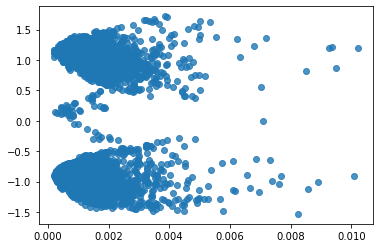

In [173]:
(cooks, p) =influence.cooks_distance
(dffits,p) = influence.dffits
leverage = influence.hat_matrix_diag
print("Leverage vs studentized residuals")
sns.regplot(leverage , model.resid_pearson , fit_reg = False)

In [179]:
datares = pd.concat([pd.Series(model.resid, name = 'resid'), pd.Series(model.predict(), name = "predict")], axis = 1)



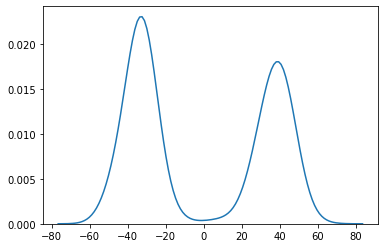

In [180]:
sns.distplot(np.array(datares.resid), hist=False)

c:\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


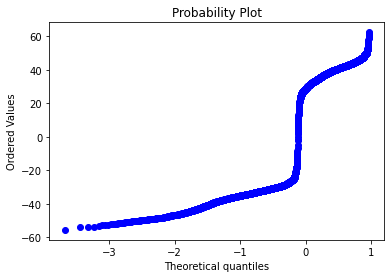

In [184]:
import pylab
import scipy.stats as stats
stats.probplot(datares.resid, dist="norm", plot=pylab)
pylab.show()

In [185]:
from scipy.stats import shapiro

stat, p =shapiro(datares.resid)
alpha = 0.05
if p > alpha:
    print('Hatalar Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)')
else:
    print('Hatalar Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)')
    

Hatalar Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)


c:\python38\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
